In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


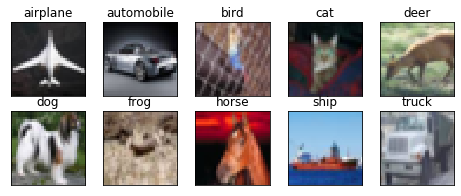

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 A

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_32 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 96)       

In [0]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(zoom_range=0.0, 
#                              horizontal_flip=False)


# # train the model
# start = time.time()
# # Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                  validation_data = (test_features, test_labels), verbose=1)
# end = time.time()
# print ("Model took %0.2f seconds to train"%(end - start))
# # plot model history
# plot_model_history(model_info)
# # compute test accuracy
# print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Assignment 3:

1. Run this (Links to an external site.) network (base network) for 50 epochs, report Validation Accuracy after 50 epochs. 
2. Add new cells at the bottom of the code, and write your own network such that:
 - it uses depthwise separable convolution ONLY (no Conv2D)
 - it uses BatchNormalization 
 - has less than 100,000 parameters
 - it uses proper dropout values
 - you've mentioned the output size for each layer
 - you've mentioned the receptive field for each layer
 - runs for 50 epochs
 - beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)

In [0]:
from keras.callbacks import Callback
from keras import backend as K


class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency.
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    The amplitude of the cycle can be scaled on a per-iteration or
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each
        cycle iteration.
    For more detail, please see paper.
    # Example for CIFAR-10 w/ batch size 100:
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    # References
      - [Cyclical Learning Rates for Training Neural Networks](
      https://arxiv.org/abs/1506.01186)
    """

    def __init__(
            self,
            base_lr=0.001,
            max_lr=0.006,
            step_size=2000.,
            mode='triangular',
            gamma=1.,
            scale_fn=None,
            scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        if mode not in ['triangular', 'triangular2',
                        'exp_range']:
            raise KeyError("mode must be one of 'triangular', "
                           "'triangular2', or 'exp_range'")
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1 / (2.**(x - 1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma ** x
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr is not None:
            self.base_lr = new_base_lr
        if new_max_lr is not None:
            self.max_lr = new_max_lr
        if new_step_size is not None:
            self.step_size = new_step_size
        self.clr_iterations = 0.

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr - self.base_lr) * \
                np.maximum(0, (1 - x)) * self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr - self.base_lr) * \
                np.maximum(0, (1 - x)) * self.scale_fn(self.clr_iterations)

    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())

    def on_batch_end(self, epoch, logs=None):

        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1
        K.set_value(self.model.optimizer.lr, self.clr())

        self.history.setdefault(
            'lr', []).append(
            K.get_value(
                self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

model2 = Sequential();

# def buildConv2DBlock1Network(model, no_of_channels=32, kernel_size=3, input_shape=(32, 32, 3)):
#   for i in range(5):
#     model.add()

model2.add(SeparableConv2D(32, 3, strides=1, input_shape=(32, 32, 3))) # 32, RF: 3
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(64, 3, strides=1)) # 30, RF: 5
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(64, 3, strides=1)) # 28, RF: 7
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, 3, strides=2)) # 26, RF: 9
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(64, 3, strides=1)) # 12, RF: 13
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, 3, strides=1)) # 10, RF: 17
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(128, 3, strides=2)) # 8, RF: 21
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(256, 3, padding='same', strides=1)) # 4, RF: 29
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(SeparableConv2D(10, 3, padding='same', strides=1)) # 4, RF: 37
# model2.add(BatchNormalization())
# model2.add(Activation('relu'))
# model2.add(Dropout(0.1))

model2.add(GlobalMaxPooling2D())
model2.add(Dense(num_classes, activation='softmax'))


def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_37 (Separab (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_34 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_42 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_38 (Separab (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_35 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
activation_43 (Activation)   (None, 28, 28, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=(array([[[..., verbose=1, callbacks=[<__main__..., steps_per_epoch=390)`


Epoch 1/50
  5/390 [..............................] - ETA: 2:39 - loss: 2.3014 - acc: 0.1187

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.153787). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


390/390 [==============================] - 29s 74ms/step - loss: 2.0407 - acc: 0.2240 - val_loss: 1.7300 - val_acc: 0.3686
Epoch 2/50
390/390 [==============================] - 27s 70ms/step - loss: 1.4750 - acc: 0.4588 - val_loss: 1.5925 - val_acc: 0.4824
Epoch 3/50
390/390 [==============================] - 27s 70ms/step - loss: 1.2705 - acc: 0.5444 - val_loss: 1.4074 - val_acc: 0.5284
Epoch 4/50
390/390 [==============================] - 27s 69ms/step - loss: 1.1458 - acc: 0.5947 - val_loss: 1.2573 - val_acc: 0.5649
Epoch 5/50
390/390 [==============================] - 27s 70ms/step - loss: 1.0620 - acc: 0.6252 - val_loss: 1.3443 - val_acc: 0.5633
Epoch 6/50
390/390 [==============================] - 27s 70ms/step - loss: 1.0013 - acc: 0.6502 - val_loss: 1.5097 - val_acc: 0.5289
Epoch 7/50
390/390 [==============================] - 27s 69ms/step - loss: 0.9518 - acc: 0.6666 - val_loss: 1.2328 - val_acc: 0.6021
Epoch 8/50
390/390 [==============================] - 27s 69ms/step - los

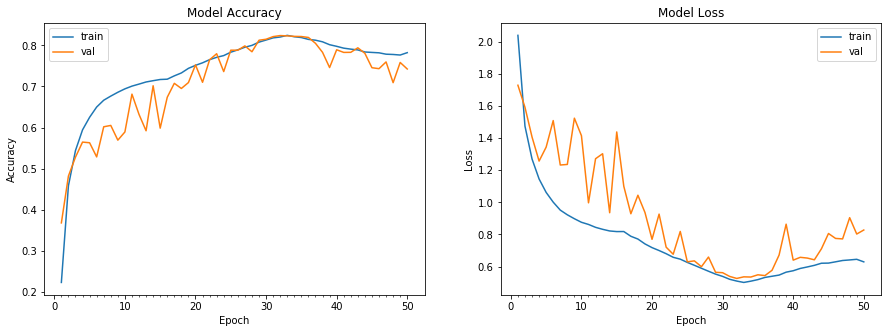

Accuracy on test data is: 74.25


In [16]:
from keras.preprocessing.image import ImageDataGenerator

# define the minimum learning rate, maximum learning rate, batch size,
# step size, CLR method, and number of epochs
MIN_LR = 1e-7
MAX_LR = 1e-2
BATCH_SIZE = 64
STEP_SIZE = 8
CLR_METHOD = "triangular"

clr = CyclicLR(
	mode=CLR_METHOD,
	base_lr=MIN_LR,
	max_lr=MAX_LR,
	step_size=STEP_SIZE * (train_features.shape[0] // BATCH_SIZE))

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    )

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size=128),
                                  samples_per_epoch=train_features.shape[0], epochs=50,
                                  validation_data=(test_features, test_labels), verbose=1,
                                  callbacks=[clr]
                                  # callbacks=[LearningRateScheduler(scheduler, verbose=1)]
                                  )
end = time.time()
print('Model took %0.2f seconds to train'%(end - start))
# plot model history
plot_model_history(model_info)
# Compute test accuracy
print('Accuracy on test data is: %0.2f'%accuracy(test_features, test_labels, model2))